# Indice vetro

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
from jax import grad
from jax import numpy as jnp

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from giopy import Interpolazione, final_val
from interpolazione import Interpolazione as LinearInterpolation

sys.path.append(dir_path)

<ErrorbarContainer object of 3 artists>

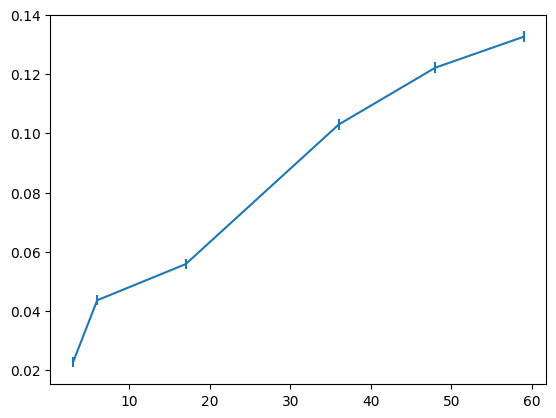

In [2]:
αi = np.array([-2.4, -2.4, -2.4, -2.4, -2.4, -2.4])
αf = np.array([-1.1, 0.1, 0.8, 3.5, 4.6, 5.2])
ΔN = np.array([3, 6, 17, 36, 48, 59])

Δα = np.radians(αf - αi)
sigmaα = np.radians(0.1)
λ = 632.8 * 10**(-9)
d = 0.00575

plt.errorbar(ΔN, Δα,yerr=sigmaα)

$n_{vetro} = \frac{(2d − \Delta N \lambda)(1 − \cos\Delta\alpha)}{2d · (1 − \cos\Delta\alpha) − \Delta N \lambda }$


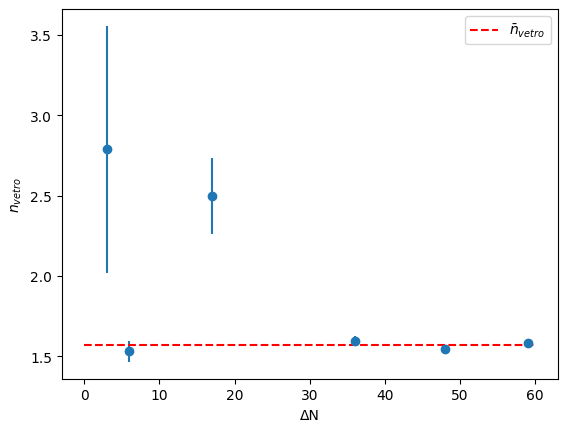

n_vetro:  1.572 ± 0.015 


In [31]:
def n_vetro_f(Δα, ΔN):
    num = (2*d - ΔN*λ)*(1 - jnp.cos(Δα))
    den = 2*d*(1 - jnp.cos(Δα)) - ΔN*λ
    return num/den
    
def sigma_n_vetro_f(Δα, ΔN,sigmaα):
    return np.abs(np.array([grad(n_vetro_f, 0)(α, N) for α, N in zip(Δα, ΔN)])*sigmaα)

n_vetro = n_vetro_f(Δα, ΔN)
sigma_n_vetro = sigma_n_vetro_f(Δα, ΔN, sigmaα)

n_vetro_m = np.average(n_vetro, weights=1/sigma_n_vetro**2)
sigma_n_vetro_m = np.sqrt(1/np.sum(1/sigma_n_vetro**2))

#print(n_vetro)
#print(sigma_n_vetro)

plt.errorbar(ΔN, n_vetro, yerr=sigma_n_vetro, fmt='o')
plt.xlabel('ΔN')
plt.ylabel('$n_{vetro}$')
plt.hlines(n_vetro_m, 0, 60, colors='r', linestyles='dashed',label='$\\bar{n}_{vetro}$')
plt.legend()
plt.show()

print('n_vetro: ', final_val(n_vetro_m, sigma_n_vetro_m,decimals=3))

# INDICE VETRO (FIT)

invertendo la relazione: $n_{vetro} = \frac{(2d − \Delta N \lambda)(1 − \cos\Delta\alpha)}{2d · (1 − \cos\Delta\alpha) − \Delta N \lambda }$

ricaviamo l'indice come parametro libero:

$\cos\alpha = \frac{(1-n_{vetro})(2d-\Delta N \lambda)}{2d(1-n_{vetro})-\Delta N \lambda}$

----------------- VALORI FIT: -----------------
n_vetro: 1.645 ± 0.017 

dof: 5
chi2: 110.49
chi2 ridotto: 22.1
pvalue: 0.0
------------------------------------------------



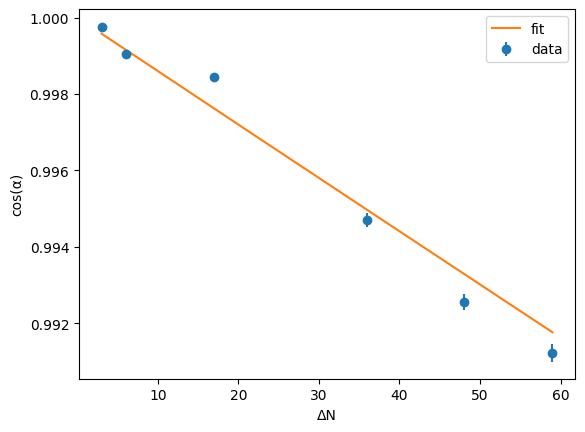

In [26]:
cosα = np.cos(Δα)
sigmacosα = np.abs(np.sin(Δα)*sigmaα)

def cos_VS_N(ΔN,n_vetro):
    num = (1-n_vetro)*(2*d-ΔN*λ)
    den = 2*d*(1-n_vetro) - ΔN*λ
    return num/den

fit = Interpolazione(ΔN, cosα, sigmacosα,np.zeros_like(ΔN), cos_VS_N, [n_vetro_m],names=['n_vetro'])

print(fit)

plt.errorbar(ΔN, cosα, yerr=sigmacosα, fmt='o',label='data')
plt.plot(*fit.draw(),label='fit')
plt.legend()
plt.ylabel('cos(α)')
plt.xlabel('ΔN')
plt.show()


L'indice del vetro ottenuto non è compatibile con il precendente, seguono ipotesi:
- l'incertezza nella conta $\Delta N$ non è trascurabile
- la scelta di avere un solo parametro libero non è del tutto efficiente
- gli errori sull'asse sono evidentementemente sottostimati
- la media (fatta nel punto precedente) è puù efficiente per la stima dell'indice di rifrazione

In [27]:
# CONFRONTO valori ottenuti

t = np.abs(n_vetro_m - fit.values['n_vetro'])/np.sqrt(sigma_n_vetro_m**2 + fit.errors['n_vetro']**2)
print(t)

3.239917478278136
